In [42]:
# setup
# Data Processing
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns

# file
import os

# folder
folder_input = '02_input'

In [2]:
# import data
# original data
org = pd.read_csv(os.path.join('..', folder_input, 'WA_Fn-UseC_-Telco-Customer-Churn.csv'))

# check any missing value
org.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
# data cleansing

# target (turn to bool)
cleaned_data = org.copy()
cleaned_data['Churn'] = cleaned_data['Churn'] == "Yes"

# total charges - " " to 0
cleaned_data['TotalCharges'] = cleaned_data['TotalCharges'].str.replace(" ", "0", case=False, regex=False)
cleaned_data = cleaned_data.astype({'TotalCharges': 'float64'})

# drop useless cols
cleaned_data = cleaned_data.drop(
    labels=['customerID'],
    axis=1
)

# cleaned_data.head()

In [4]:
cleaned_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,False
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True


In [38]:
pd.crosstab(index=cleaned_data['Churn'], columns=cleaned_data['Contract'])


Contract,Month-to-month,One year,Two year
Churn,,,
False,2220,1307,1647
True,1655,166,48


In [41]:
cleaned_data['Is_Contract_Locked'] = cleaned_data['Contract'] != 'Month-to-month'
cleaned_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Is_Contract_Locked
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,False,False
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,False,True
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,True,False
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,False,True
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,True,False


<Axes: xlabel='Churn', ylabel='tenure'>

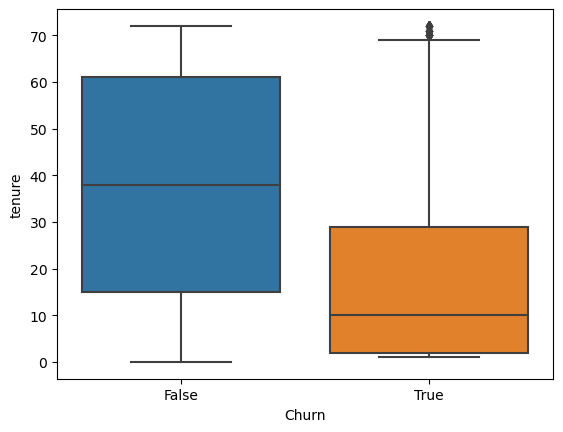

In [51]:
sns.boxplot(
    # data=cleaned_data[cleaned_data['Is_Contract_Locked'] == True],
    data=cleaned_data,
    x='Churn',
    y='tenure'#,
    # hue='Is_Contract_Locked'
)

<Axes: xlabel='Churn', ylabel='tenure'>

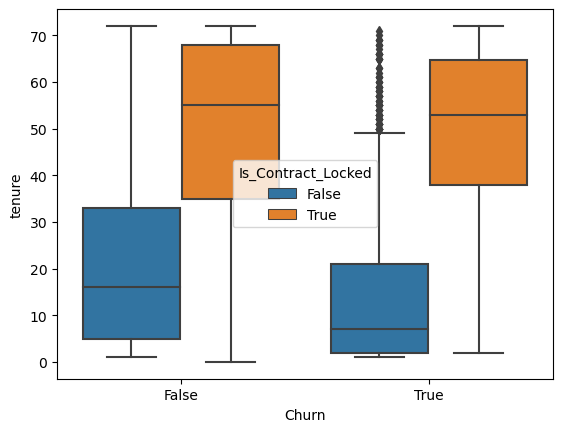

In [52]:
# churn vs tenure


sns.boxplot(
    # data=cleaned_data[cleaned_data['Is_Contract_Locked'] == True],
    data=cleaned_data,
    x='Churn',
    y='tenure',
    hue='Is_Contract_Locked'
)


<Axes: xlabel='Is_Contract_Locked', ylabel='tenure'>

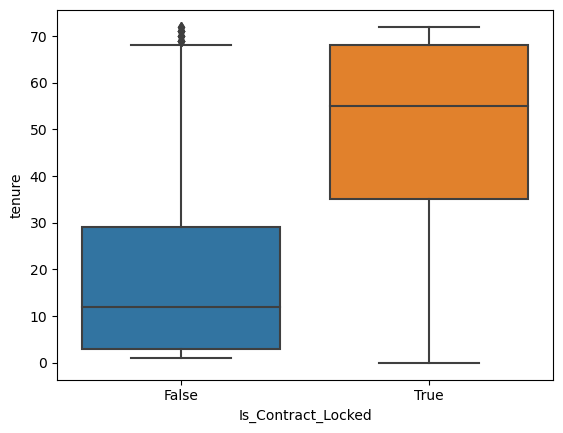

In [53]:
# contract locked and tenure

sns.boxplot(
    data=cleaned_data,
    x='Is_Contract_Locked',
    y='tenure'
)


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

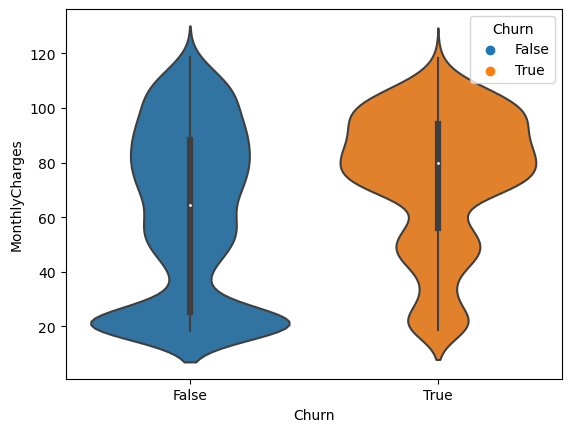

In [57]:
#monthly charges
sns.violinplot(
    data=cleaned_data,
    x='Churn',
   y='MonthlyCharges' 
)

<Axes: xlabel='tenure', ylabel='TotalCharges'>

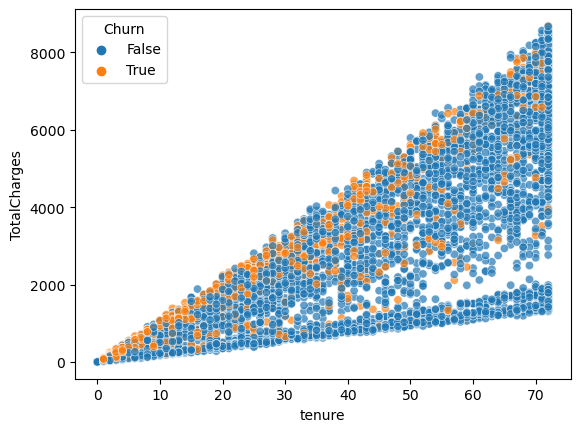

In [65]:
# total charges
sns.scatterplot(
    data=cleaned_data,
    x='tenure',
   y='TotalCharges' ,
   hue='Churn',
   alpha = 0.7
)

<Axes: xlabel='InternetService', ylabel='MonthlyCharges'>

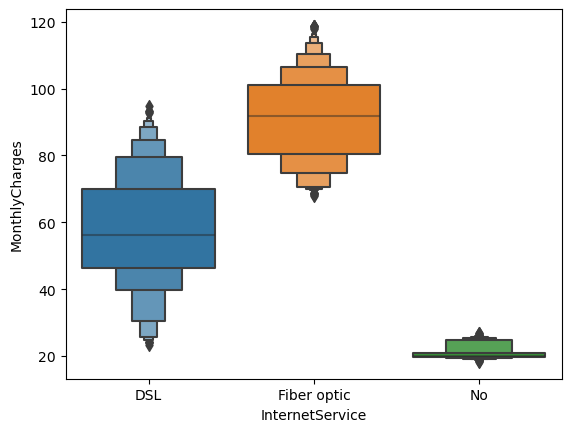

In [68]:
# internet vs monthly charge
sns.boxenplot(
    data=cleaned_data,
    x = 'InternetService',
    y = 'MonthlyCharges'
)